In [190]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('C:/Users/jb100/OneDrive/Documents/Linear Algebra Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df= pd.read_csv("C:/Users/jb100/OneDrive/Documents/Linear Algebra Project/heart_disease_patients.csv")

C:/Users/jb100/OneDrive/Documents/Linear Algebra Project\heart_disease_patients.csv


In [191]:
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [192]:
df = pd.read_csv('C:/Users/jb100/OneDrive/Documents/Linear Algebra Project/heart_disease_patients.csv', delimiter=',', nrows = 304)
df.dataframeName = 'heart_disease_patients.csv'
new_df = df.drop(['id','sex','fbs','restecg','exang','cp','slope'],axis=1).dropna()
new_df.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4


In [193]:
from scipy.stats import norm

def plotPerColumnDistribution(df):
    colors = {0:'lawngreen',1:'coral',2:'mediumblue',3:'orange',4:'cyan', 5:'silver'}
    plt.figure(figsize=(20,20))
    for i,x in enumerate(df.columns):
        label=f'''
        Mean: {round(df[x].mean(),2)} 
        Std: {round(df[x].std(),2)}
        Min: {round(df[x].min(),2)}
        
        Max:{round(df[x].max(),2)}
        Q1: {round(df[x].quantile(0.25))}
        Q2:{round(df[x].quantile(0.5),2)} 
        Q3:{round(df[x].quantile(0.75),2)} 
        '''
        plt.subplot(3,2,i+1)
        plt.title(x.upper(),fontsize=15)
        sns.histplot(df[x], color=colors[i], kde=True, label=label)
        mu, std = norm.fit(df[x])
        x_range = np.linspace(df[x].min(), df[x].max(), 100)
        pdf = norm.pdf(x_range, mu, std)
        plt.legend(fontsize=15)

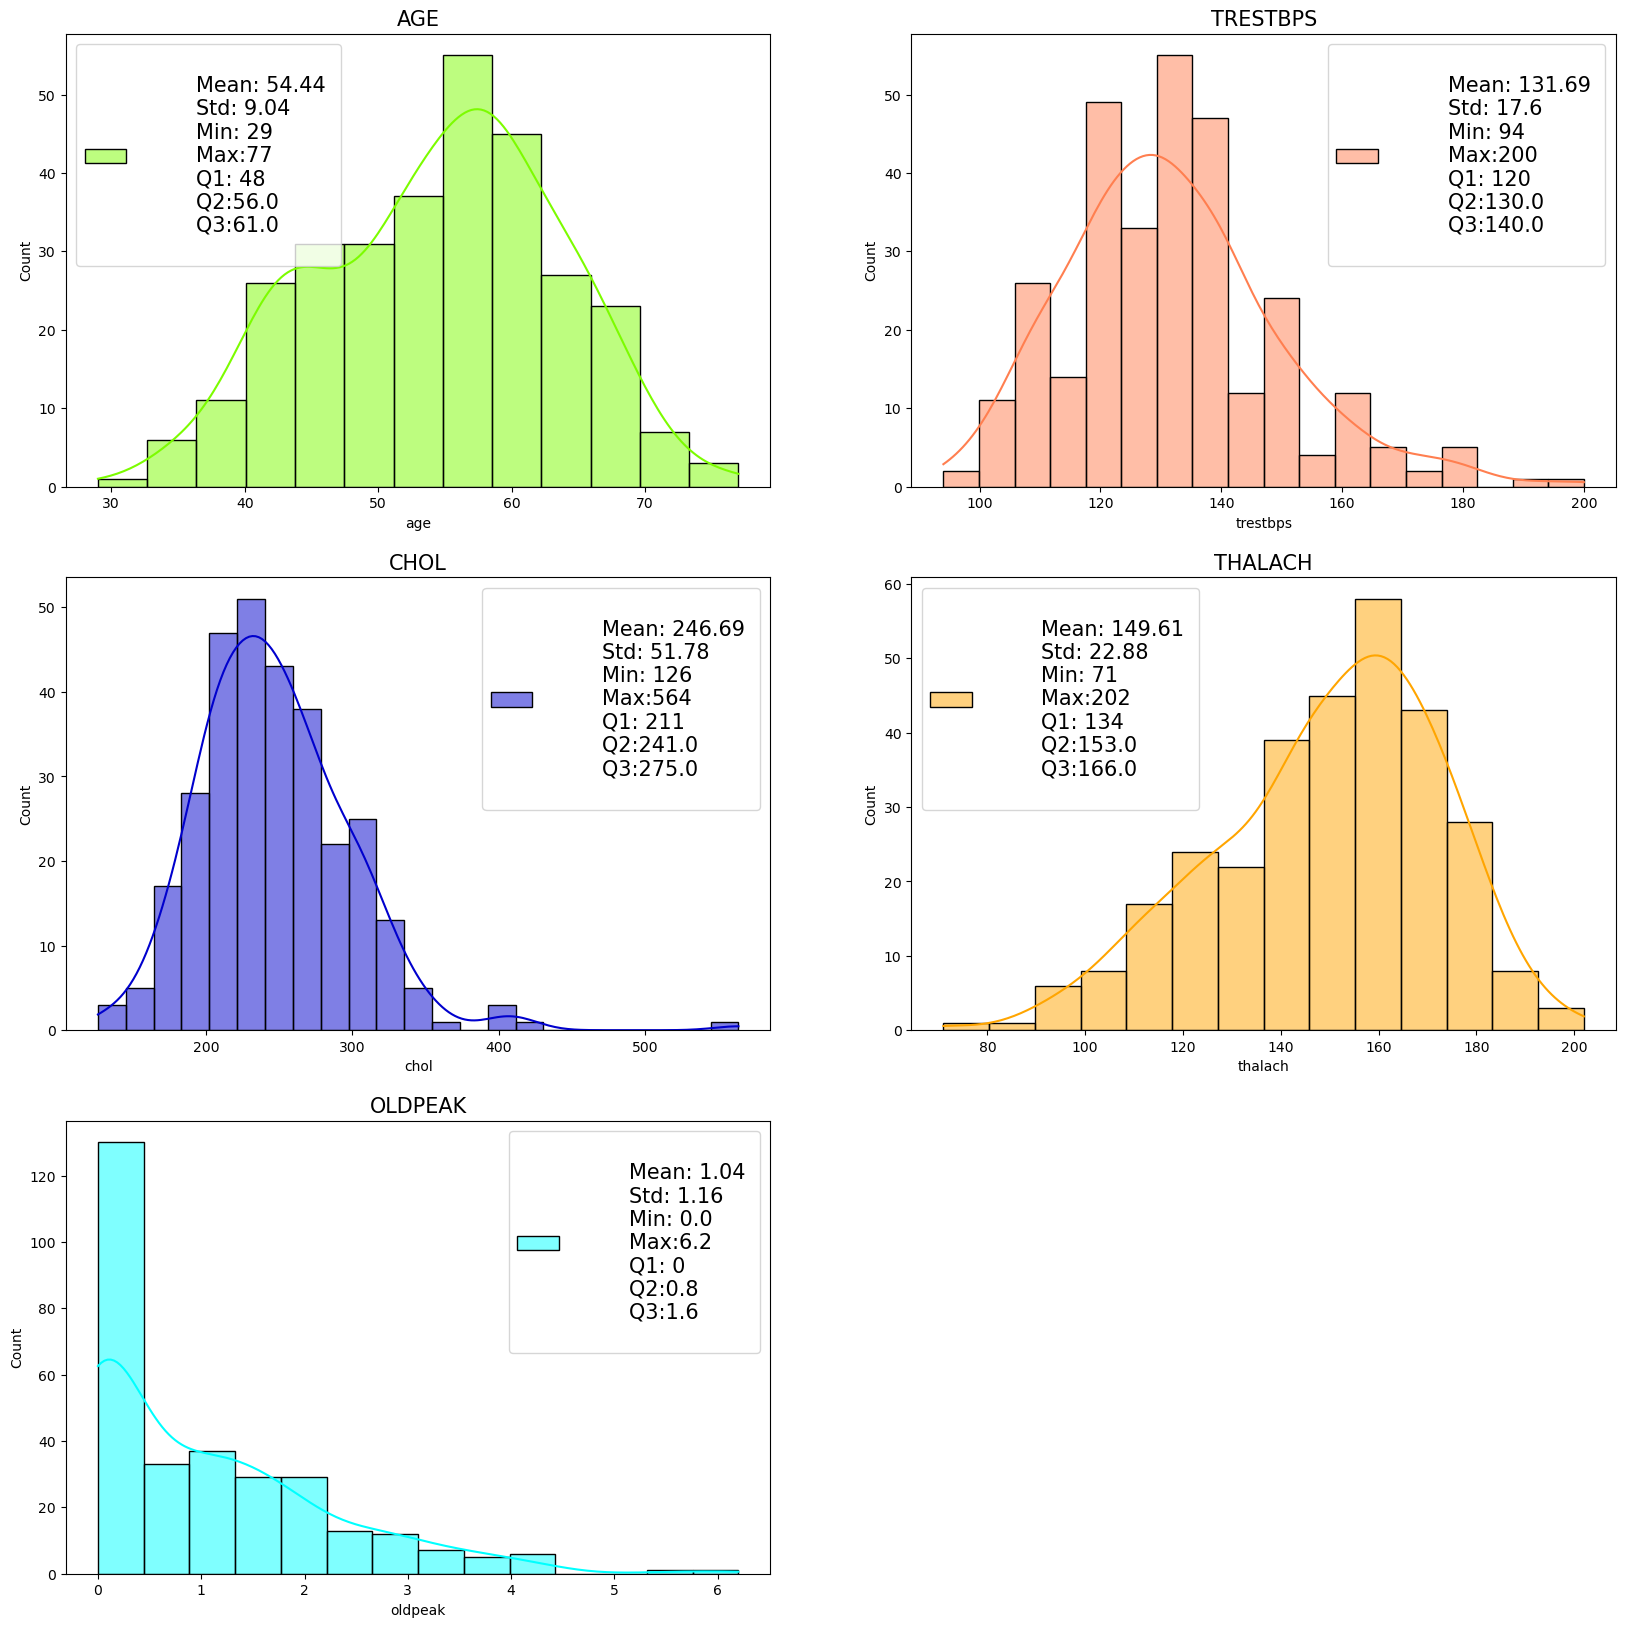

In [195]:
plotPerColumnDistribution(new_df)

In [52]:
def pair_corr(df):
    bin_cols = ['id','sex','fbs','restecg','exang','cp','slope']
    corr = pd.DataFrame(columns=df.columns, index=df.columns)
    for x in corr.columns:
        for i in corr.index:
            if x in bin_cols and i in bin_cols:
                corr[x][i]= matthews_corrcoef(df[x], df[i])
            elif ((x in bin_cols) and (i not in bin_cols)) or ((x not in bin_cols) and (i  in bin_cols)):
                corr[x][i] = 0
            else:
                corr[x][i] = np.corrcoef(df[x],df[i])[0,1]
    return corr
        
    
def r_ij(pair_corr):
    coeff =[[],[],[],[],[]]
    for  i in range(0,5):
        for j in range(0,5):
            alg_= np.delete(np.delete(pair_corr, i, axis=1), j, axis = 0) 
            r_ij = ((-1)**(i+j))*np.linalg.det(alg_)
            coeff[i].append(r_ij)
    return coeff

def get_chast_corr(df, coeff):
    chast_corr = [[],[],[],[],[]]
    for i in range(0,5):
        for j in range(0,5):
            if i == j:
                r_ij = 1
            else:
                r_ij = - coeff[i][j] / (coeff[i][i]*coeff[j][j])**(1/2)
            chast_corr[i].append(r_ij)
    return pd.DataFrame(data=chast_corr,
           index= df.columns,
          columns= df.columns)

<AxesSubplot:>

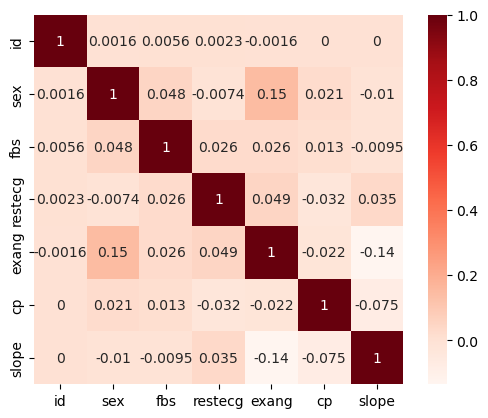

In [70]:
pcorrbin = pair_corr(df).loc[['id','sex','fbs','restecg','exang','cp','slope']][['id','sex','fbs','restecg','exang','cp','slope']]
sns.heatmap(pcorrbin.astype(float), vmax=1, square=True,annot=True, cmap='Reds')

In [171]:
from sklearn.cluster import AgglomerativeClustering
def wss_calculation(K, data, dist, meth):
    WSS = []
    for i in range(K):
        cluster = AgglomerativeClustering(n_clusters= i+1, affinity=dist, linkage=meth)  
        cluster.fit_predict(data)
        # cluster index
        label = cluster.labels_
        wss = []
        for j in range(i+1):
            # extract each cluster according to its index
            idx = [t for t, e in enumerate(label) if e == j]
            cluster = data[idx,]
            # calculate the WSS:
            cluster_mean = cluster.mean(axis=0)
            distance = np.sum(np.abs(cluster - cluster_mean)**2,axis=-1)
            wss.append(sum(distance))
        WSS.append(sum(wss))
    return WSS

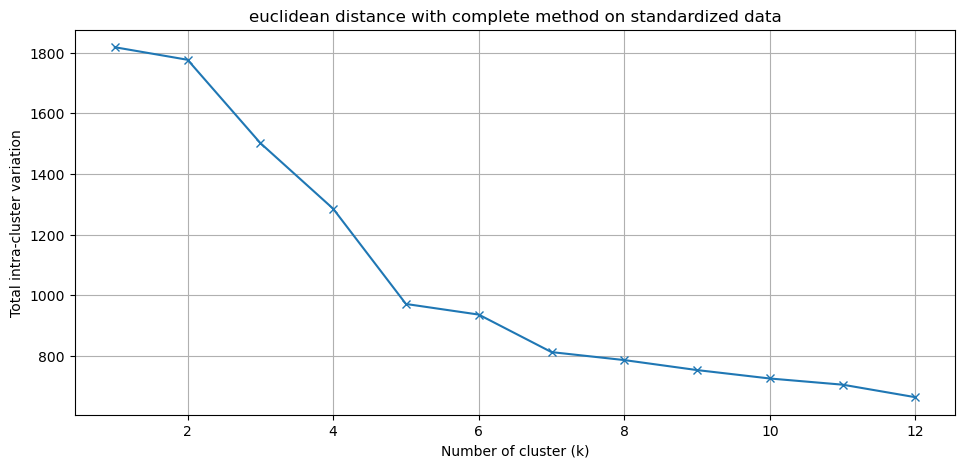

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

In [196]:
metrics = ['euclidean']
methods = ['complete']


for method in methods:
    for metric in metrics:  
            if (metric == 'euclidean' and method=='average'):
                break
            
            plt.figure(figsize=(25,5))
            WSS=wss_calculation(12, Xsscaled, metric, method)
            cluster_range = range(1, 13)

            plt.subplot(1,2,2)
            plt.grid(True)
            plt.title(f'{metric} distance with {method} method on standardized data')
            plt.xlabel('Number of cluster (k)')
            plt.ylabel('Total intra-cluster variation')
            plt.plot(cluster_range, WSS, marker = "x")

            plt.show()

plt.figure(figsize=(20,5))

In [210]:
from sklearn.cluster import KMeans

#function for grouping clusters in 2d-features dimension
def createseq(points, y_hc, cluster,i,j):
    a = np.array([x[i] for x in points])[np.where(y_hc==cluster)]
    b = np.array([x[j] for x in points])[np.where(y_hc==cluster)]
    return np.vstack((a,b))

def Kmeans1(data, NUM):
    km = KMeans(init='k-means++', n_clusters=NUM, n_init=12)
    km.fit_transform(data)
    y_km = km.labels_
    ccolors = {0:'tomato',1:'green',2:'blue',3:'darkviolet',4:'darkkhaki', 5:'palegreen'}
    plt.figure(figsize=(20,20))
    count = 0
    for i in range(0,5):
        for j in range(i,5):
            if i != j:
                count+=1
                for c in range(0,NUM):
                    cluster = c
                    seq = createseq(data, y_km, cluster,i,j)
                    means = (seq[0].mean(),seq[1].mean())
                    plt.subplot(5,2,count)
                    plt.scatter(seq[0], seq[1],  
                                c=ccolors[c], 
                                label = f'Average: ({means[0].astype(float).round(3)},{means[1].astype(float).round(3)})') 
                    plt.xlabel(f'{new_df.columns[i]}')
                    plt.ylabel(f'{new_df.columns[j]}')
                    plt.legend()
                    plt.scatter(km.cluster_centers_[:,i], km.cluster_centers_[:,j],marker='x', s=200, 
                                 linewidths=3, color='red')      
    plt.show()
    return(y_km)

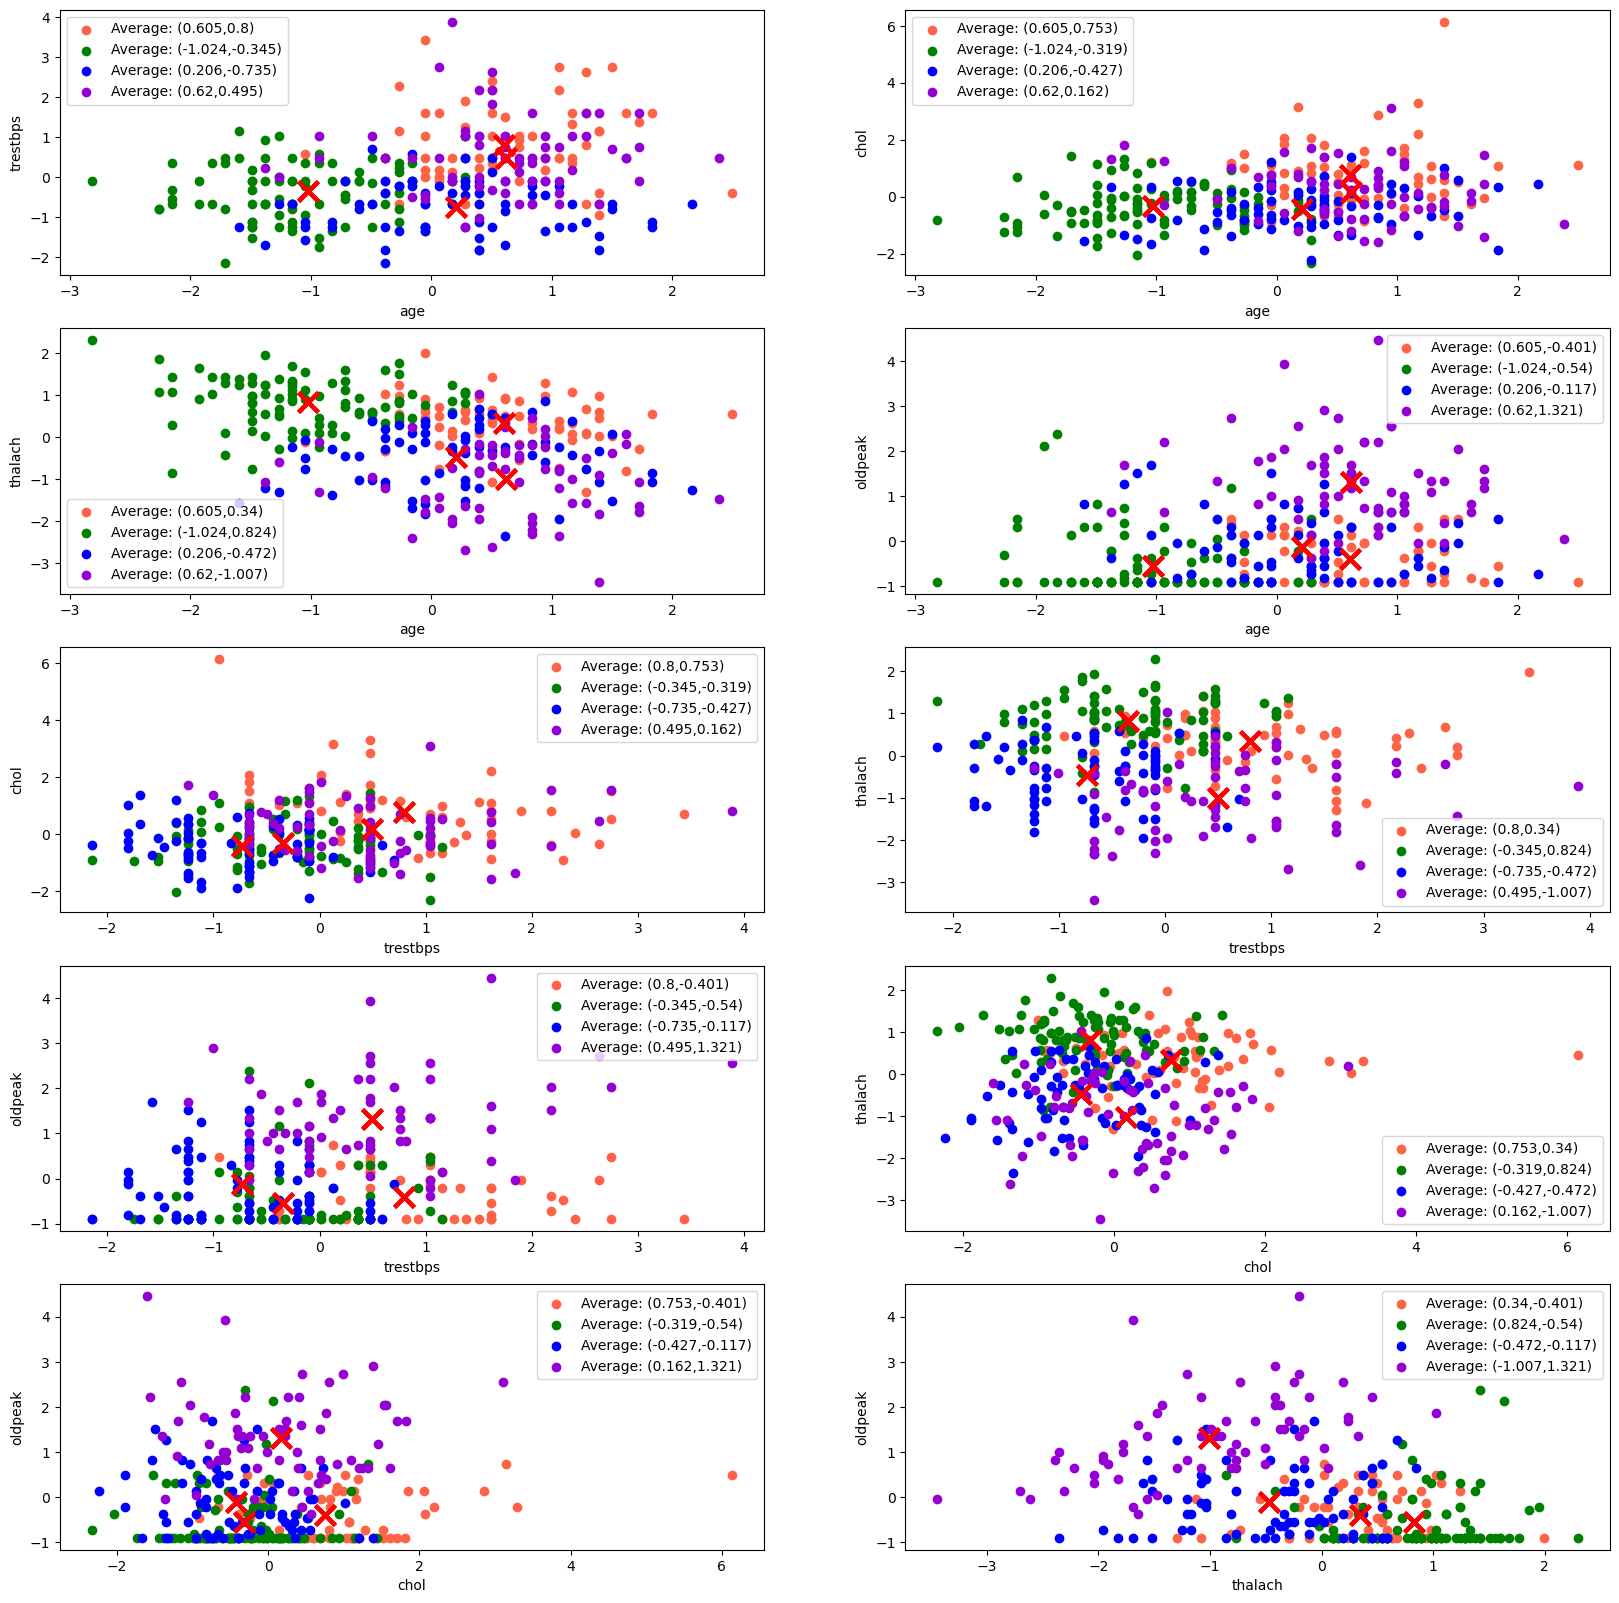

In [211]:
clust_eu_stand = Kmeans1(Xsscaled, 4)

In [212]:
new_df['cluster_norm'] = clust_cos_norm

means = pd.DataFrame(columns=['Cluster1','Cluster2', 'Cluster3', 'Cluster4'], index=new_df.columns[:-1])
for i in range(0,4):
    df1 = new_df[new_df['cluster_norm'] == i]
    for x in df1.columns:
        if x not in ['cluster_norm','cluster_stand']:
            means.iloc[:,i][x] = round(df1[x].mean(),3)
means

,Cluster1,Cluster2,Cluster3,Cluster4
age,60.03,45.2,59.897,56.297
trestbps,140.394,125.632,145.75,118.784
chol,255.045,230.221,285.618,224.622
thalach,126.621,168.421,157.368,138.824
oldpeak,2.571,0.414,0.575,0.904


In [206]:
# from nltk.cluster.kmeans import KMeansClusterer
# from nltk.cluster.util import cosine_distance

# def Kmeans2(data, NUM_CLUSTERS):
#     km = KMeansClusterer(NUM_CLUSTERS, distance=cosine_distance, repeats=14)
#     assigned_clusters = km.cluster(data, assign_clusters=True)
#     y_km = np.array(assigned_clusters)
#     ccolors = {0:'tomato',1:'green',2:'blue',3:'darkviolet',4:'darkkhaki', 5:'palegreen'}
#     count = 0
#     plt.figure(figsize=(20,20))
#     for i in range(0,5):
#         for j in range(i,5):
#             if i != j:
#                 count+=1
#                 for c in range(0, NUM_CLUSTERS):
#                     cluster = c
#                     seq = createseq(data, y_km, cluster,i,j)
#                     means = (seq[0].mean(),seq[1].mean())
#                     plt.subplot(5,2,count)
#                     plt.scatter(seq[0], seq[1],  
#                                 c=ccolors[c], 
#                                 label = f'Average: ({means[0].astype(float).round(3)},{means[1].astype(float).round(3)})')
#                     plt.xlabel(f'{new_df.columns[i]}')
#                     plt.ylabel(f'{new_df.columns[j]}')
#                     plt.legend() 
#                       plt.scatter(km.cluster_centers_[:,i], km.cluster_centers_[:,j],marker='x', s=200, 
#                                  linewidths=3, color='red') 
                  
#     plt.show()
#     return(y_km)

In [186]:
# clust_cos_norm = Kmeans2(Xnscaled,4)

In [187]:
# new_df['cluster_norm'] = clust_cos_norm
# new_df['cluster_stand'] = clust_eu_stand

# means = pd.DataFrame(columns=['Cluster1','Cluster2', 'Cluster3', 'Cluster4'], index=new_df.columns[:-2])
# for i in range(0,4):
#     df1 = new_df[new_df['cluster_norm'] == i]
#     for x in df1.columns:
#         if x not in ['cluster_norm','cluster_stand']:
#             means.iloc[:,i][x] = round(df1[x].mean(),3)
# means